# Simple example of optimization using Genetic algorithms

Sum of a list of numbers must add to a fixed number

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Creates an individual of n length who should add up to be Z

def individual():
    return list(np.random.randint(0, 100, 10))

In [4]:
#Create a list of individuals

def population(n_pop):
    return [individual() for i in range(n_pop)]

In [5]:
# Fitness function

def fitness(ind, goal):
    return abs(goal - np.sum(ind))

In [6]:
def population_fitness(pop, goal):
    return np.average([fitness(i, goal) for i in pop])

In [7]:
# Random selection

def rand_select(fit, unfit, random_selection):
    for i in unfit:
        if random_selection > np.random.random():
            fit.append(i)
    return fit

In [8]:
# Mutations

def mutate(ind):
    mutate_pos = np.random.randint(0,len(ind))
    mutate_val = np.random.randint(10,50)
    ind[mutate_pos] = mutate_val
    return ind

In [9]:
# Crossover (one point)

def crossover(male, female):
    point_of_cross = int(len(male)/2)
    child = male[:point_of_cross] + female[point_of_cross:]
    return child

1. calculate fitness of population
2. sort population by fitness
3. retain 20% as fit, remaining as unfit
4. random select few from unfit and add to new fit
5. mutate few from new fit
6. for remaining number of population left, crossover fit
7. return new parents

In [10]:
# Evolve

def evolve(pop, goal, mutation=0.05, random_selection = 0.05, retain=0.2):
    fitness_scores = [(i,fitness(i,goal)) for i in pop]
    fittest_first = sorted(fitness_scores, key=lambda x:x[1])
    
    #retain fittest
    retain_len = int(len(pop)*0.2)
    fit = fittest_first[:retain_len]
    unfit = fittest_first[retain_len:]
    
    #random select to fit from unfit
    new_fit = [i[0] for i in rand_select(fit, unfit, random_selection)]
    
    #Mutate
    for i in new_fit:
        if mutation > np.random.random():
            mutate(i)
    
    #Crossover
    remaining_pop = len(pop) - len(new_fit)
    children = []
    
    while len(children) < remaining_pop:
        parent_indices = np.random.choice(len(new_fit), 2)
        parents = [new_fit[i] for i in parent_indices]
        child = crossover(parents[0], parents[1])
        children.append(child)
        
    new_pop = new_fit+children
        
    return new_pop

In [11]:
def generations(n_generations, pop, goal):
    
    fitness_history = []
    for i in range(n_generations):
        fitness_history.append(population_fitness(pop, goal))
        pop = evolve(pop, goal)
        
    plt.plot(fitness_history)
    
    fitness_scores = [(i,fitness(i,goal)) for i in pop]
    best_citizen = sorted(fitness_scores, key=lambda x:x[1])[0]
    
    return best_citizen
    #return pop

([33, 78, 15, 19, 28, 67, 99, 33, 58, 70], 0)

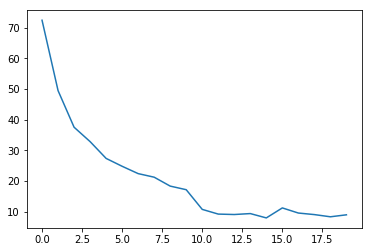

In [12]:
pop = population(1000)
generations(20, pop, 500)

In [3]:
from tpot import TPOTClassifier

In [4]:
tpot = TPOTClassifier()